In [58]:
import pandas as pd
import time
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch
from torch.utils.data import random_split
import matplotlib.pyplot as plt

In [59]:
%matplotlib inline

<h3>Read the data sets from the pickle files into a dataframe</h3>

In [60]:
data_df = pd.read_pickle('data_df_2015-2020-20-endpoints.pickle')
games_df = pd.read_pickle('games_df_2015-2020.pickle')

In [61]:
data_df.loc['2018-02-06', 'Utah']

opponent-points-per-game                102.300
points-per-game                         103.400
true-shooting-percentage                111.700
opponent-true-shooting-percentage       111.100
assists-per-game                         21.500
assists-per-possession                    0.218
assist--per--turnover-ratio               1.494
turnovers-per-possession                 14.600
defensive-efficiency                      1.038
opponent-effective-field-goal-pct        52.400
average-margin-thru-3-quarters           -0.500
opponent-4th-quarter-points-per-game     25.200
offensive-efficiency                      1.049
average-scoring-margin                    1.100
opponent-defensive-rebounding-pct        79.900
opponent-offensive-rebounding-pct        21.200
defensive-rebounding-pct                 78.800
offensive-rebounding-pct                 20.100
opponent-average-biggest-lead            12.700
Name: (2018-02-06 00:00:00, Utah), dtype: float64

In [62]:
stds = data_df.std()
means = data_df.mean()
maxs = data_df.max()
mins = data_df.min()
print(stds)
print(means)
print(maxs)
print(mins)

opponent-points-per-game                5.592883
points-per-game                         5.951214
true-shooting-percentage                4.477047
opponent-true-shooting-percentage       3.929086
assists-per-game                        2.400331
assists-per-possession                  0.021395
assist--per--turnover-ratio             0.211399
turnovers-per-possession                1.328363
defensive-efficiency                    0.036458
opponent-effective-field-goal-pct       2.164196
average-margin-thru-3-quarters          4.722737
opponent-4th-quarter-points-per-game    1.533830
offensive-efficiency                    0.041615
average-scoring-margin                  5.301693
opponent-defensive-rebounding-pct       2.789662
opponent-offensive-rebounding-pct       2.282240
defensive-rebounding-pct                2.282214
offensive-rebounding-pct                2.789688
opponent-average-biggest-lead           2.986547
dtype: float64
opponent-points-per-game                104.462681
poi

<h2>standardizing the data<h2>

In [63]:
for col in data_df:
    print(col)
    print(means[col])
    data_df[col] = data_df[col].apply(lambda x: (x-means[col])/stds[col])

opponent-points-per-game
104.46268077601411
points-per-game
104.47089506172838
true-shooting-percentage
108.33624779541445
opponent-true-shooting-percentage
108.35395502645504
assists-per-game
22.530873015873016
assists-per-possession
0.22367050264550264
assist--per--turnover-ratio
1.558205687830688
turnovers-per-possession
14.483143738977075
defensive-efficiency
1.0372025132275131
opponent-effective-field-goal-pct
50.82338183421517
average-margin-thru-3-quarters
0.008470017636684299
opponent-4th-quarter-points-per-game
25.515586419753088
offensive-efficiency
1.0372785273368605
average-scoring-margin
0.007729276895943565
opponent-defensive-rebounding-pct
76.45209435626103
opponent-offensive-rebounding-pct
23.550295414462077
defensive-rebounding-pct
76.44972663139329
offensive-rebounding-pct
23.547936507936505
opponent-average-biggest-lead
12.046058201058203


In [64]:
data_df

opponent-points-per-game  points-per-game  \
2014-11-01 Atlanta                      0.811267        -0.415192   
           Boston                       0.096072         2.777434   
           Brooklyn                     2.956851         0.088907   
           Charlotte                    0.274871         0.593006   
           Chicago                     -1.334317         0.256940   
...                                          ...              ...   
2019-03-31 Sacramento                   1.848299         1.618007   
           San Antonio                  1.043705         1.248334   
           Toronto                      0.703987         1.651614   
           Utah                         0.310630         1.130711   
           Washington                   2.277416         1.668417   

                        true-shooting-percentage  \
2014-11-01 Atlanta                      1.667115   
           Boston                       3.118965   
           Brooklyn                     1.198056   
           Charlotte                   -3.179830   
           Chicago                      1.622443   
...                                          ...   
2019-03-31 Sacramento                   0.326946   
           San Antonio                  1.153384   
           Toronto                      1.421417   
           Utah                         0.997031   
           Washington                   1.041703   

                        opponent-true-shooting-percentage  assists-per-game  \
2014-11-01 Atlanta                              -1.337195          1.445270   
           Boston                                1.360633          2.278488   
           Brooklyn                              3.549438         -1.054385   
           Charlotte                             1.946011          1.861879   
           Chicago                              -4.365890          0.195443   
...                                                   ...               ...   
2019-03-31 Sacramento                            0.953414          1.278626   
           San Antonio                           0.647999          0.862017   
           Toronto                              -0.039183          1.153644   
           Utah                                 -0.191891          1.361948   
           Washington                            1.767853          1.611914   

                        assists-per-possession  assist--per--turnover-ratio  \
2014-11-01 Atlanta                    1.884960                    -0.899747   
           Boston                     2.165394                     2.818338   
           Brooklyn                  -1.433508                    -2.867588   
           Charlotte                  1.230614                     2.454098   
           Chicago                    0.295834                    -1.155188   
...                                        ...                          ...   
2019-03-31 Sacramento                 0.763224                     1.560055   
           San Antonio                0.809963                     2.288535   
           Toronto                    0.856702                     1.120129   
           Utah                       1.183875                     0.751159   
           Washington                 1.183875                     1.408683   

                        turnovers-per-possession  defensive-efficiency  \
2014-11-01 Atlanta                      3.626160              1.941875   
           Boston                      -1.492923             -0.663841   
           Brooklyn                     4.378966              3.587590   
           Charlotte                   -1.869326             -1.541556   
           Chicago                      2.271108             -1.843270   
...                                          ...                   ...   
2019-03-31 Sacramento                  -1.342362              1.009303   
           San Antonio                 -2.019888              1.228732   
      

In [65]:
data_df['true-shooting-percentage'].idxmax()

(Timestamp('2017-11-01 00:00:00'), 'Golden State')

<h3>Convert the dataframes into a list 'training_data'
Each element of training data represents one game. Each element contains the home team and away team data for that date and a bool detailing if the home team won</h3>

In [66]:
training_data = []
for i in range(len(games_df)):
    try:
        game = games_df.loc[i]

        homeTeam, awayTeam = str(game.Home), str(game.Away)
        date_str = str(game.Date.date())
        home_index = (date_str, homeTeam) # Index to get the stats for a team on a certain date from data_df
        away_index = (date_str, awayTeam)
        home_stats = data_df.loc[home_index].to_numpy()
        home_stats = np.append(home_stats, [1]) # append 1 to array representing that this team was the home team
        away_stats = data_df.loc[away_index].to_numpy()
        # array_to_append = np.array([ np.array([home_stats.to_numpy(), away_stats.to_numpy()]), game.DidHomeWin])
        # stats = np.array([home_stats.to_numpy(), away_stats.to_numpy()]) # make a 2d array for model eventually
        training_data.append([home_stats, away_stats, int(game.DidHomeWin)]) # [1, 0 ] if AWAY WON,and [0,1] if HOME WON
    except KeyError as e:
        pass
        #print(date_str) 
        #print(home_index)

In [67]:
print(len(training_data))

5342


<h3>Turn the list into tensors and then a TensorDataset</h3>

In [68]:
num_data_points = len(training_data[0][0])*2
x_vals = [x[0:2] for x in training_data]
x_vals = torch.FloatTensor(x_vals)
x_vals = x_vals.view(-1, num_data_points)
y_vals = [y[2] for y in training_data]
y_vals = torch.LongTensor(y_vals)
print(f'x_vals[0]: {x_vals[0]} \ny_vals[0]: {y_vals[0]}')
print(f'x_vals.shape: {x_vals.shape} \ny_vals.shape: {y_vals.shape}')

x_vals[0]: tensor([-2.1032,  0.1393, -0.2538, -3.2969,  0.0705,  0.0154,  0.2876, -0.5143,
        -3.3793, -3.0142,  2.8144,  1.8153,  0.0414,  2.3940, -0.5205,  3.2642,
        -3.2643,  0.5205, -3.1294, -0.2079, -0.0287,  1.3544,  0.1644, -0.2212,
        -0.0781, -1.2498,  1.9700,  0.1316, -0.1956,  1.8404,  1.4242,  0.3538,
         0.1872,  0.6266, -0.6355,  0.6355, -0.6266, -2.6941]) 
y_vals[0]: 1
x_vals.shape: torch.Size([5342, 38]) 
y_vals.shape: torch.Size([5342])


In [69]:
dataset = TensorDataset(x_vals, y_vals)
train_ds, val_ds = random_split(dataset, [4842, 500])

In [70]:
std_loader = DataLoader(train_ds, batch_size=len(train_ds), num_workers=1)
data = next(iter(std_loader))

In [71]:
# plt.hist(data[0]) #this takes a looonnngnggg time

In [113]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [114]:
import torch.nn as nn
import torch.nn.functional as F

In [115]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [116]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [117]:

class BBallNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(38, 64) 
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64,2)
        
    def forward(self, data):
        out = self.fc1(data)
        out = torch.sigmoid(out)
        out = self.fc2(out)
        out = torch.sigmoid(out)
        out = self.fc3(out)
        out = torch.sigmoid(out)
        out = self.fc4(out)
        out = torch.sigmoid(out)
        out = self.fc5(out)
        return out
    
    def training_step(self, batch):
        data, win_labels = batch 
        out = self(data)                  # Generate predictions
        loss = F.cross_entropy(out, win_labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate losszz
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [131]:
def fit(epochs, learning_rate, model, train_loader, val_loader, opt_func=torch.optim.AdamW): # mess around with optimizer
    optimizer = opt_func(model.parameters(), learning_rate)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
        adjust_learning_rate(learning_rate, optimizer, epoch)

    return history

In [132]:
def adjust_learning_rate(lr, optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    lr = lr * 0.2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [133]:
BBModel = BBallNet()

In [138]:
history = fit(20, 0.01, BBModel, train_loader, val_loader)

Epoch [0], val_loss: 0.6199, val_acc: 0.6552
Epoch [1], val_loss: 0.6193, val_acc: 0.6552
Epoch [2], val_loss: 0.6177, val_acc: 0.6532
Epoch [3], val_loss: 0.6166, val_acc: 0.6572
Epoch [4], val_loss: 0.6162, val_acc: 0.6572
Epoch [5], val_loss: 0.6135, val_acc: 0.6606
Epoch [6], val_loss: 0.6129, val_acc: 0.6547
Epoch [7], val_loss: 0.6156, val_acc: 0.6572
Epoch [8], val_loss: 0.6132, val_acc: 0.6528
Epoch [9], val_loss: 0.6174, val_acc: 0.6552
Epoch [10], val_loss: 0.6120, val_acc: 0.6528
Epoch [11], val_loss: 0.6144, val_acc: 0.6552
Epoch [12], val_loss: 0.6117, val_acc: 0.6567
Epoch [13], val_loss: 0.6108, val_acc: 0.6552
Epoch [14], val_loss: 0.6157, val_acc: 0.6572
Epoch [15], val_loss: 0.6114, val_acc: 0.6567
Epoch [16], val_loss: 0.6139, val_acc: 0.6630
Epoch [17], val_loss: 0.6090, val_acc: 0.6572
Epoch [18], val_loss: 0.6095, val_acc: 0.6591
Epoch [19], val_loss: 0.6092, val_acc: 0.6596


Text(0.5, 1.0, 'Loss vs. No. of epochs')

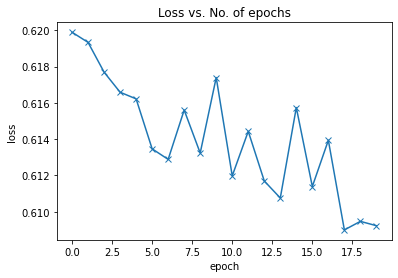

In [139]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

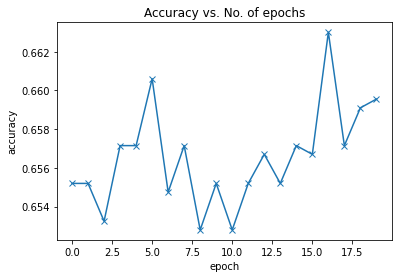

In [140]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')